<a href="https://colab.research.google.com/github/joakru-astro/joakru-astro/blob/main/Between_the_Lines_empty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Between the Lines workshop 2024
## Stellar Spectroscopy in Exoplanet research, Elyar Sedaghati
## 3rd of December 2024

In this short presentation, we will look at how to first measure the Radial Velocity (RV) of a star given a high resolution echelle spectrum of that star with the ESPRESSO instrument, which is installed at ESO's Paranal observatory in Chile. All participants shall write their own analysis code to obtain this RV value for the given echelle spectrum. Once done, and if time permits, we will then analyze an spectral time series of 51 peg hosting an exoplanet.

This same methodology was used by [Mayor & Queloz (1995)](https://ui.adsabs.harvard.edu/abs/1995Natur.378..355M/abstract) in the discovery of 51 Peg b, which won them the **physics Nobel Prize in 2019**, although the data used by them was obtained with a different spectrograph as compared to one used for the given time series.

### Cross-Correlation Function (CCF)
One approach to estimating stellar RVs is through the calculation of the cross-correlation function (CCF) which is essentially a series of dot products calculated between the stellar spectrum and a stellar model spectrum Doppler shifted to a range of RVs. Namely:

$$ CCF(\nu) = \sum_i S(\lambda_i) \cdot M(\lambda_i (1+\nu/c))    $$

where $S(\lambda_i)$ is the stellar spectrum, $M(\lambda_i)$ is the model spectrum doppler shifted for a source moving at velocity $\nu$. The RV of the stellar is the shift value at which this function is at maximum.

## Tasks

1.   **We will now write code in python from scratch to calculate the RV for a star, given an echelle spectrum taken with ESPRESSO at Paranal.**
  *   Read and familiarize yourself with the spectrum
  *   Write a function to Doppler shift a given wavelength array for an RV value
  *   Obtain a template for the star given that:
      *   T$_{\textrm{eff}}$ = 6628K
      *   $\log{g}$ = 4.251
      *   [Fe/H] = 0.17
  *   Write a function to calculate the CCF, given a spectrum and a model. *Important: note that this function needs to include a resampling step where the model fluxes are resampled onto the wavelength grid of the data. Otherwise the dot product is meaningless.*
  *   Run the function over all echelle orders and save the CCFs into a single two-dimensional array
  *   Plot all individual CCFs, as well as the total CCF (simple sum).
  *   Fit a Gaussian function to the normalized total CCF, from which you will obtain the RV and its precision.

2.   **If time permits, we will try to fit a Keplerian model to a set of RV time series data, in order to confirm the planetary nature of the companion.**
  *   Read and plot the 51 Peg b time series RV data provided
  *   Obtain an analytical model of an Keplerian orbit using the [${\tt PyAstronomy}$](https://pyastronomy.readthedocs.io/en/latest/) package.
  *   Fit the model to the data to obtain optimised parameter values (no need for obtaining posterior distributions, and therefore uncertainties)
  *   Calculate the mass of the companion given the results from the fit.

In [ ]:
# getting the example data from GitHub
!rm -r Between_the_Lines/
!git clone https://github.com/esedagha/Between_the_Lines
!ls Between_the_Lines

Cloning into 'Between_the_Lines'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 12.41 MiB | 25.99 MiB/s, done.
51Peg_RVs.ascii  ESPRESSO_S2D_BLAZE_A.fits


In [ ]:
!pip install expecto                  # python package for downloading stellar templates
!pip install ipympl                   # package needed for the interactive widget

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 959.8/959.8 kB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.4/92.4 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.8/122.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.4/275.4 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 3.4 MB/s eta 0:00:00
  Created wheel for expecto: filename=expecto-0.1.4-py3-none-any.whl size=6967 sha256=6a3bbbc146d1fb87a4c6ef100451f82f87c04413b325e8280a3e059a8c89f9c3
  Stored in directory: /root/.cache/pip/wheels/30/6b/dd/ffdd2e9d570e77eecdab242b

In [ ]:
from google.colab import output
output.enable_custom_widget_manager() # needed to enable interactive matplotlib figures
import matplotlib.pyplot as plt
# enabling interactive matplotlib
%matplotlib widget

In [ ]:
# prompt: use expecto to generate spectra for
#     Teff = 6628K
#     logg = 4.251
#     [Fe/H] = 0.17

from expecto import get_spectrum
import numpy as np

# Define stellar parameters
teff = 6628
logg = 4.251
feh = 0.17

# Generate the spectrum using expecto
spec = get_spectrum(teff, logg, feh)

# The 'spec' object now contains the synthetic spectrum.
# You can access the wavelength and flux like this:
wavelength = spec.wavelength
flux = spec.flux

# Now you can use 'wavelength' and 'flux' for further calculations or plotting
# For example:
print(wavelength)
flux

[  500.     500.1    500.2  ... 54999.25 54999.5  54999.75] Angstrom


<Quantity [9.7219510e-10, 9.8520880e-10, 9.9839126e-10, ..., 1.3364116e+12,
           1.3361195e+12, 1.3363458e+12] erg / (s cm3)>

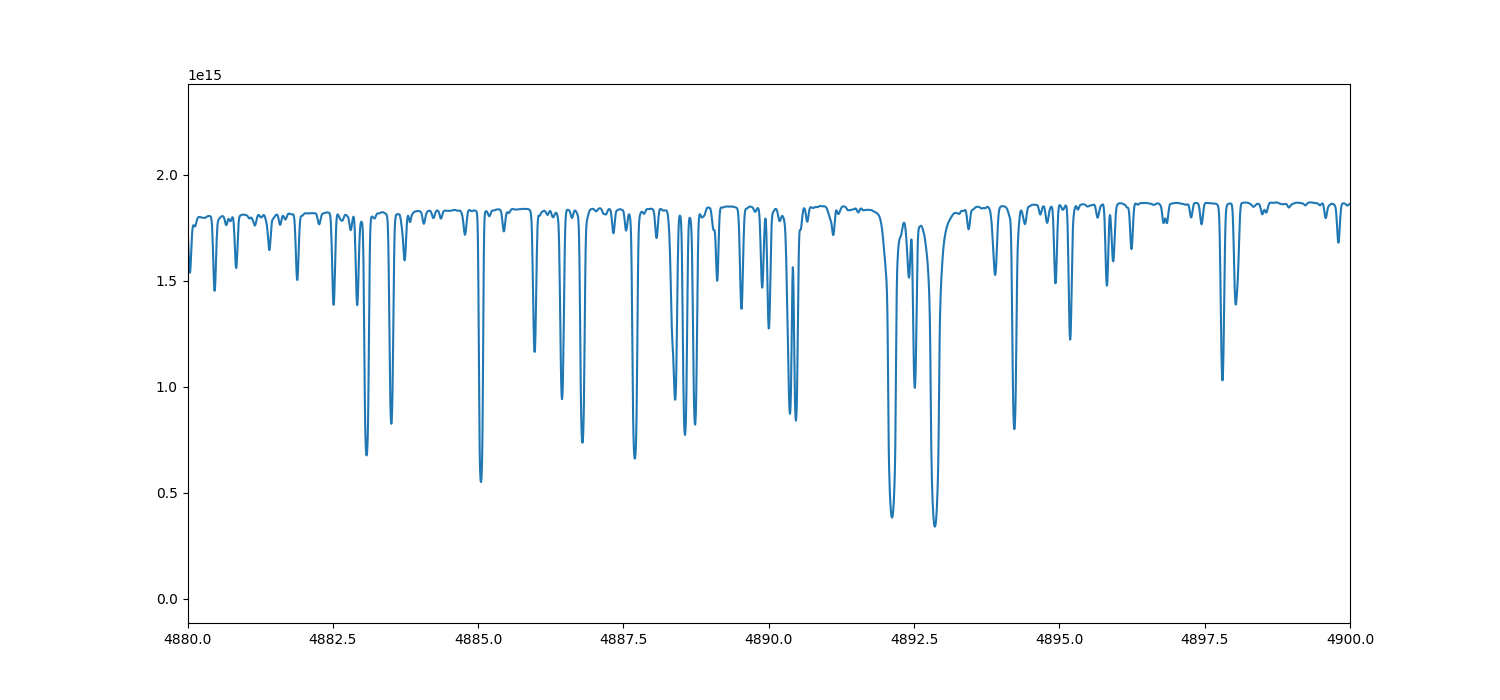

In [ ]:
import matplotlib.pyplot as plt
from astropy.visualization import quantity_support

plt.figure(figsize=(15, 7))
plt.plot(spec.wavelength, spec.flux)
plt.xlim(4880, 4900)
plt.show()

In [ ]:
get_spectrum?